In [3]:
# 1. Obróbka danych (Data Processing)

import pandas as pd
import numpy as np
import csv
loan_data = pd.read_csv(r'C:\Users\zawsz\Desktop\DS&ML\Loan_data.csv', low_memory=False) # dodanie low_memory=False ze wzgledu na problem odczytu duzej ilosci danych 


In [4]:
# usunicie kolumn i wierszy zawierających więcej niż 70% wartości null (NaN)
threshold = 0.7
loan_data = loan_data[loan_data.columns[loan_data.isnull().mean() < threshold]]
loan_data = loan_data.loc[loan_data.isnull().mean(axis=1) < threshold]

In [5]:
# usuniecie nieprzydatnych kolumn
loan_data.drop(columns = ['id', 'sub_grade', 'emp_title', 'url', 'desc', 'title',
                          'zip_code', 'recoveries', 'collection_recovery_fee',
                          'total_rec_prncp', 'total_rec_late_fee'], inplace = True)

In [6]:
# usuniecie kolumn z tylko jedna wartoscia
loan_data.drop(columns = ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 
                          'policy_code', 'application_type', 'chargeoff_within_12_mths', 'hardship_flag', 
                          'disbursement_method'], inplace = True)

In [7]:
# po dodatkowej analizie bazy danych usuniecie wszystkich kolumn gdzie wartosci inne niz dominujaca stanowia mniej niz 1% liczby wierszy tj. <= 425
# 'debt_settlement_flag', - 160
# 'tax_liens', - 1
# 'delinq_amnt', - 2
# 'acc_now_delinq', - 4                
loan_data.drop(columns = ['debt_settlement_flag', 'tax_liens', 'delinq_amnt', 'acc_now_delinq'], inplace = True)

In [8]:
# usuniecie znaku % z kolumn 'revol_util', 'int_rate'
column_name = ['revol_util', 'int_rate']
loan_data[column_name] = loan_data[column_name].apply(lambda x: x.str.replace('%', ''))

In [9]:
# zamiana typu danych 
loan_data['revol_util'] = loan_data['revol_util'].astype(float)
loan_data['int_rate'] = loan_data['int_rate'].astype(float)

In [10]:
# zaokraglenie danych dla kolumn numerycznych
column_name = ['int_rate', 'revol_util', 'installment', 'funded_amnt_inv', 'annual_inc', 'dti', 'last_credit_pull_d', 'last_pymnt_amnt', 'total_rec_int', 'total_pymnt_inv', 'total_pymnt']
loan_data[column_name] = loan_data[column_name].round()

In [11]:
# usuniecie months z kolumny term i zmiana na wartosci float 
loan_data['term'] = loan_data['term'].str.replace(' months', '').astype(int)
loan_data['term'] = loan_data['term'].astype('float')

In [12]:
# ujednolicenie wartosci
column_name = 'verification_status'
loan_data[column_name] = loan_data[column_name].str.replace('Source Verified', 'Verified')
column_name = 'loan_status'
loan_data[column_name] = loan_data[column_name].str.replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid', regex=False)
loan_data[column_name] = loan_data[column_name].str.replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off', regex=False)

In [13]:
# usuniecie years, zastapienie NaN wartoscia 0 i usuniecie wierszy z wartoscia 0
column_name = 'emp_length'
loan_data[column_name] = loan_data[column_name].str.replace('\+ years', '', regex=True)
loan_data[column_name] = loan_data[column_name].str.replace('< 1 year', str(1))
loan_data[column_name] = loan_data[column_name].str.replace(' years', '')
loan_data[column_name] = loan_data[column_name].str.replace(' year', '')
loan_data[column_name] = pd.to_numeric(loan_data[column_name])

loan_data = loan_data.fillna(0)
loan_data = loan_data[loan_data['emp_length'] != 0]

In [14]:
# usuniecie wierszy z wartoscia 0
loan_data = loan_data[loan_data['last_credit_pull_d'] != 0]
loan_data = loan_data[loan_data['last_pymnt_d'] != 0]
loan_data = loan_data[loan_data['earliest_cr_line'] != 0]
loan_data.reset_index(drop=True, inplace=True)

In [15]:
# ujednolicenie typu wartosci w kolumnach daty
column_name = ['last_credit_pull_d', 'issue_d', 'earliest_cr_line', 'last_pymnt_d']
loan_data[column_name] = loan_data[column_name].apply(pd.to_datetime)

In [16]:
# usuniecie wierszy z data mniejsza niz 1985 (stanowia niewielki odsetek)
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])
loan_data = loan_data[loan_data['earliest_cr_line'].dt.year >= 1985]
loan_data.reset_index(drop=True, inplace=True)

In [17]:
# zapisanie do nowego pliku
loan_data.to_csv('finalnaDB.csv', index=False)



In [18]:
# sprawdzenie typu wartosci w kolumnach

print(loan_data.dtypes) 
#Baza danych jest gotowa do uzycia
#Oryginalna ilosc wierszy - 42538
#Koncowa ilosc wierszy - 39060
#tj. 92%

loan_amnt                        float64
funded_amnt                      float64
funded_amnt_inv                  float64
term                             float64
int_rate                         float64
installment                      float64
grade                             object
emp_length                       float64
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                      float64
earliest_cr_line          datetime64[ns]
fico_range_low                   float64
fico_range_high                  float64
inq_last_6mths                   float64
mths_since_last_delinq           float64
open_acc                         float64
pub_rec                          float64
revol_bal       

          loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  39060.000000  39060.000000     39060.000000  39060.000000   
mean   11051.475934  10786.696109     10101.451178     42.199693   
std     7335.606999   7074.413452      7063.082245     10.505202   
min      500.000000    500.000000         0.000000     36.000000   
25%     5200.000000   5100.000000      4950.000000     36.000000   
50%     9600.000000   9600.000000      8500.000000     36.000000   
75%    15000.000000  15000.000000     14000.000000     60.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length    annual_inc           dti  \
count  39060.000000  39060.000000  39060.000000  3.906000e+04  39060.000000   
mean      12.216923    321.990783      4.972325  6.858504e+04     13.373758   
std        3.683437    206.945473      3.382111  6.331385e+04      6.718420   
min        5.000000     16.000000      1.000000  1.896000e+03      0.00

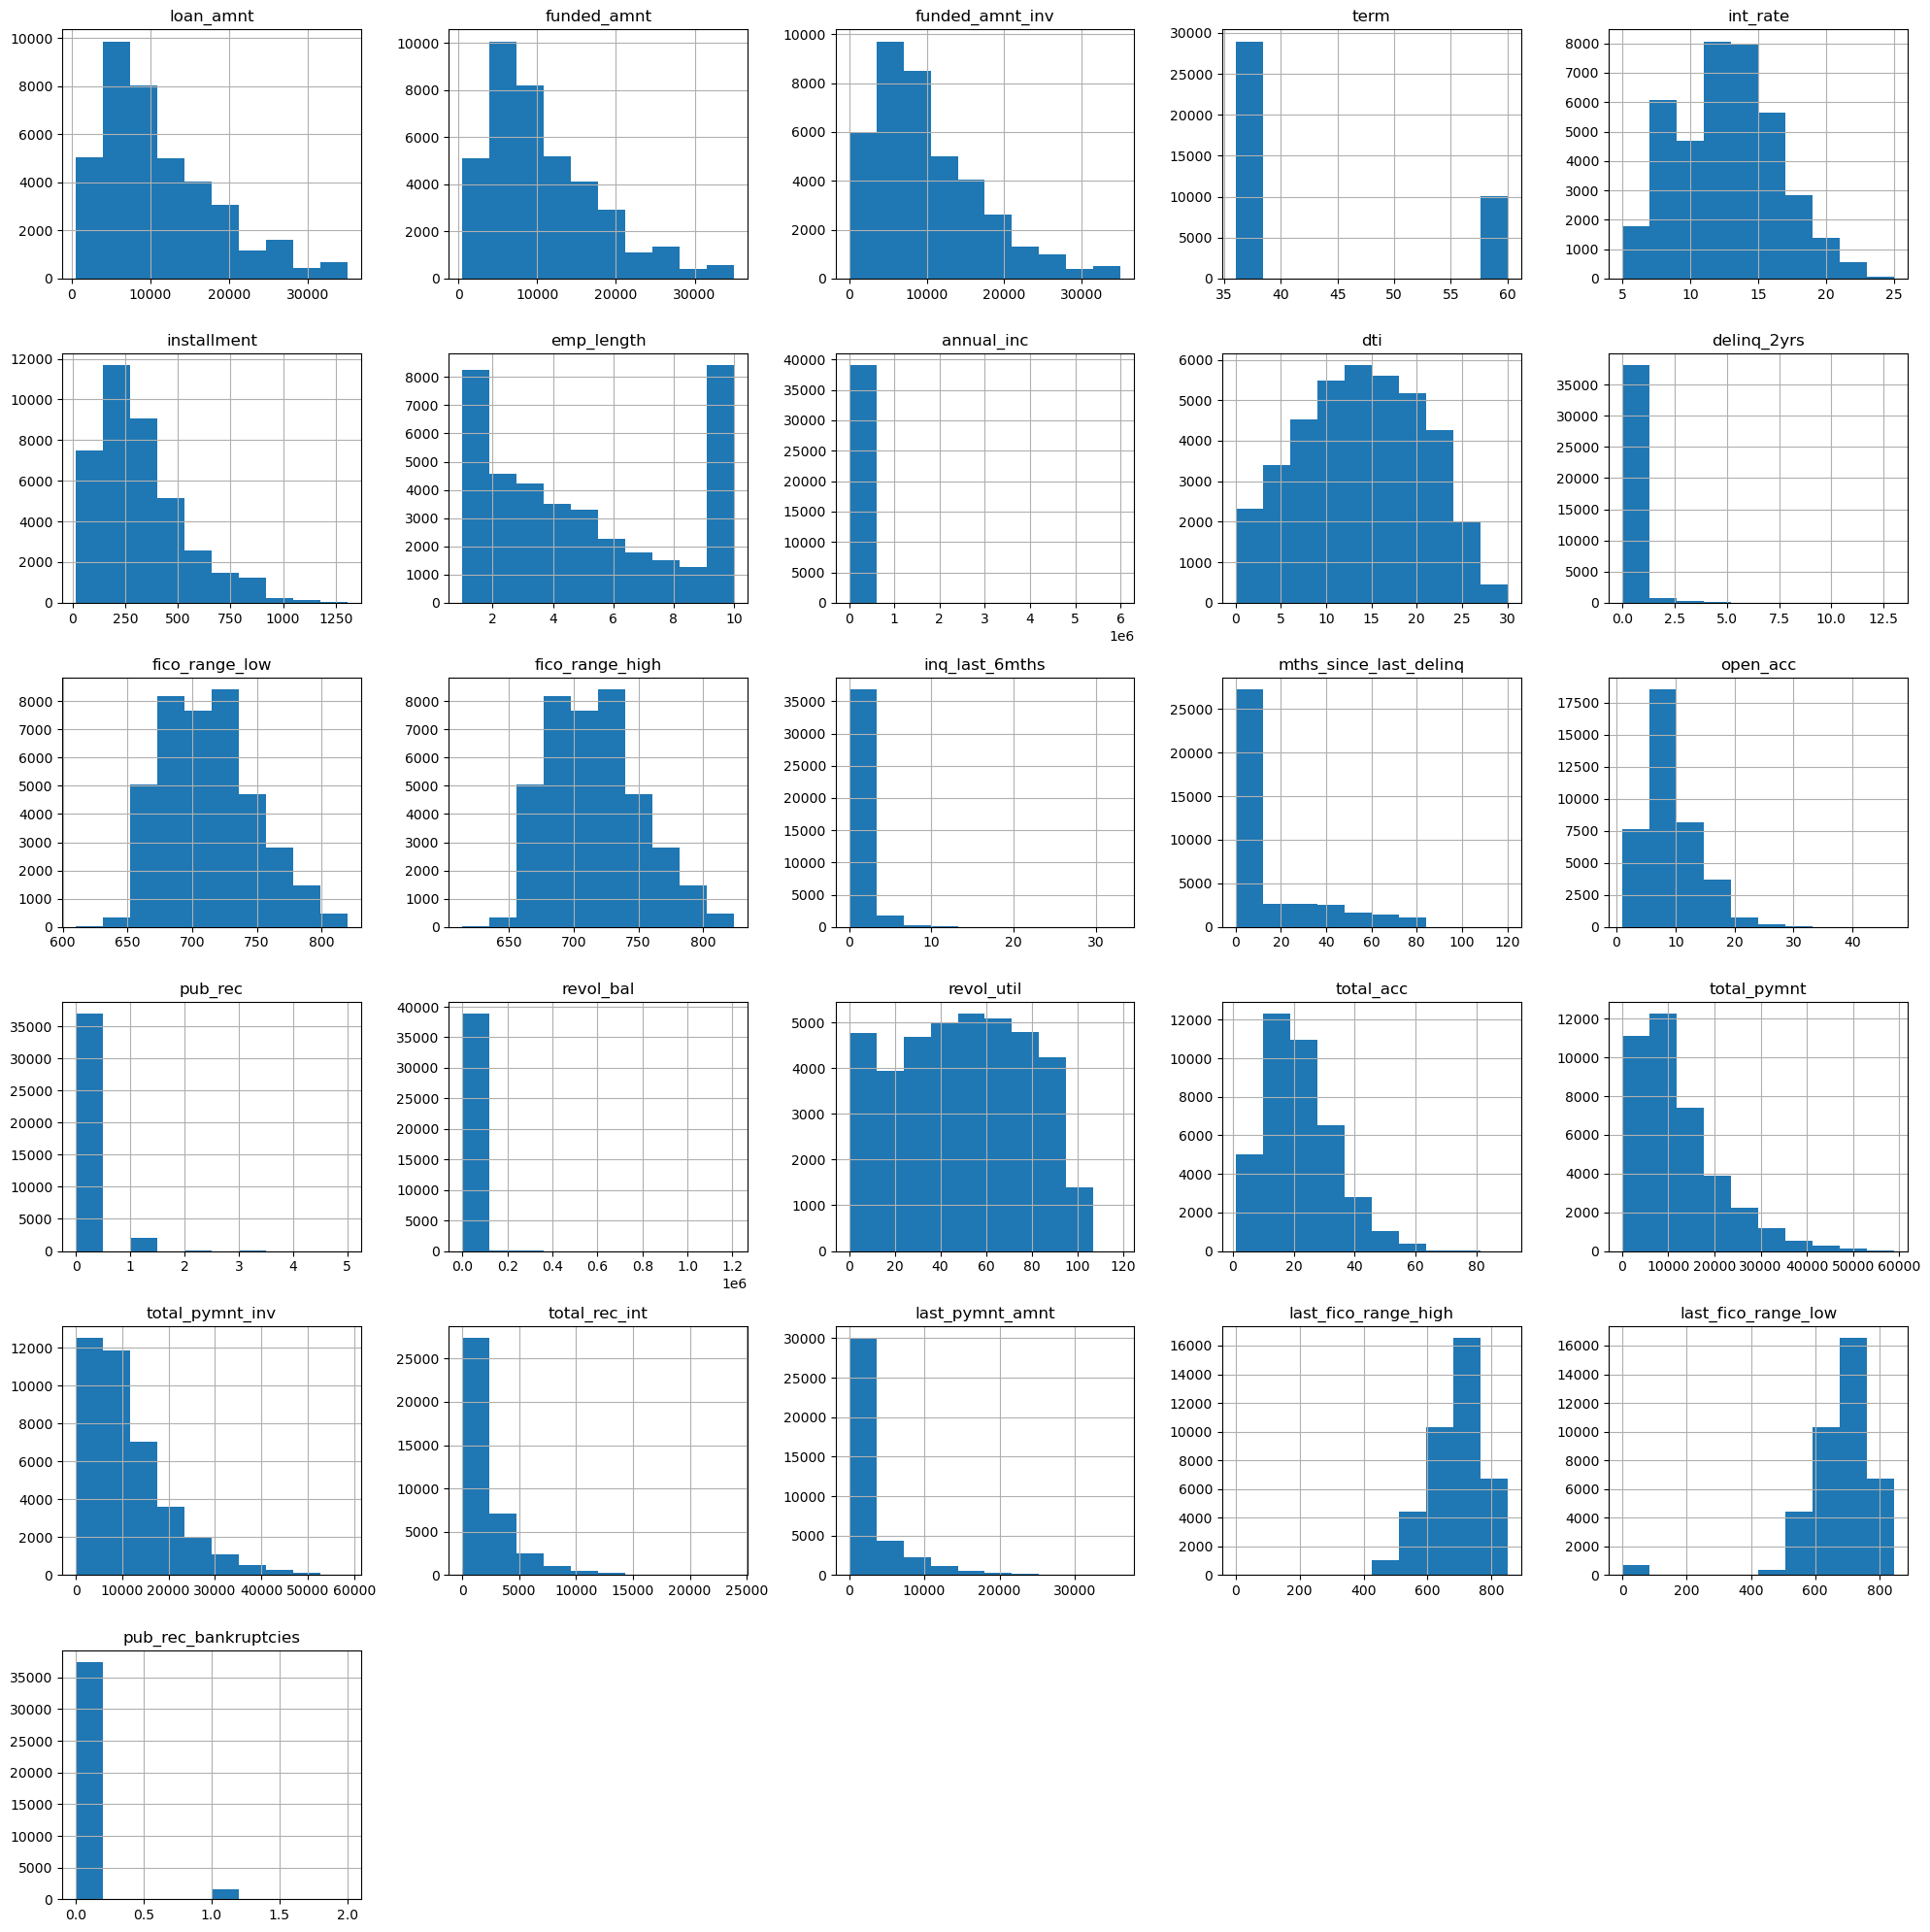

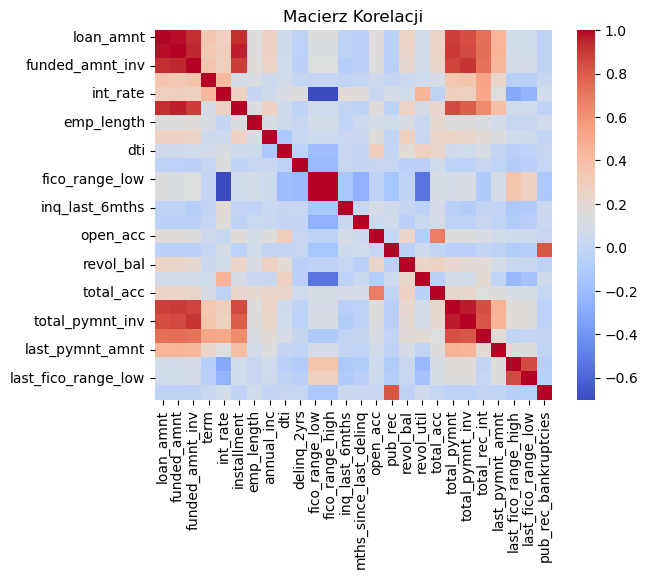

In [17]:
# 2. EDA, czyli obszerna eksploracja danych

# Wysokopoziomowa analiza danych

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
loan_data = pd.read_csv('finalnaDB.csv')
print(loan_data.describe())
loan_data.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()
correlation_matrix = loan_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz Korelacji')
plt.show()

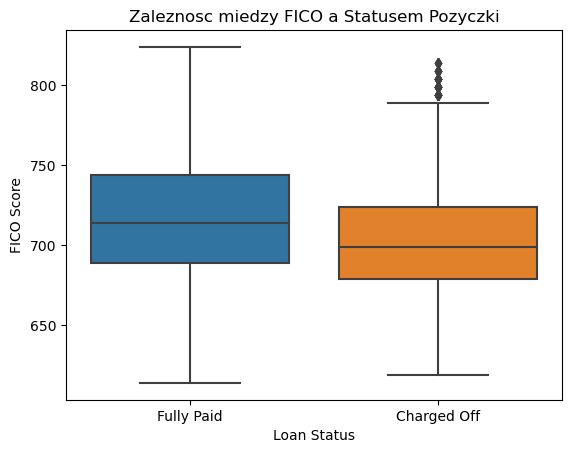

Chi-square: 869.6460029807137
P-value: 3.6248904158757786e-155


In [1]:
#1 W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
loan_data = pd.read_csv('finalnaDB.csv')
sns.boxplot(x='loan_status', y='fico_range_high', data=loan_data)
plt.xlabel('Loan Status')
plt.ylabel('FICO Score')
plt.title('Zaleznosc miedzy FICO a Statusem Pozyczki')
plt.show()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
contingency_table = pd.crosstab(loan_data['fico_range_high'], loan_data['loan_status'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square:", chi2)
print("P-value:", p_value)

#Chi-square: 869.6460029807137
#P-value: 3.6248904158757786e-155

# Wynik testu chi-kwadrat oraz p-wartość dostarczają informacji o stopniu zależności między zmiennymi. Niska p-wartość sugeruje, że istnieje statystycznie istotna zależność pomiędzy wynikami FICO a statusem pożyczki. 
# Niemniej jednak, sama p-wartość nie dostarcza informacji na temat kierunku czy siły tego związku.
# Jeśli p-wartość jest niska (np. 0.05), można przypuszczać, że istnieje istotna statystycznie zależność między wynikami FICO a statusem spłaty pożyczki.
# Jednakże, samo przeprowadzenie testu chi-kwadrat nie dostarcza informacji o sile ani naturze związku między zmiennymi. Nie możemy bezpośrednio stwierdzić, że wyższe wyniki FICO prowadzą do większego prawdopodobieństwa spłacenia pożyczki. Wynik testu sugeruje tylko istnienie zależności.

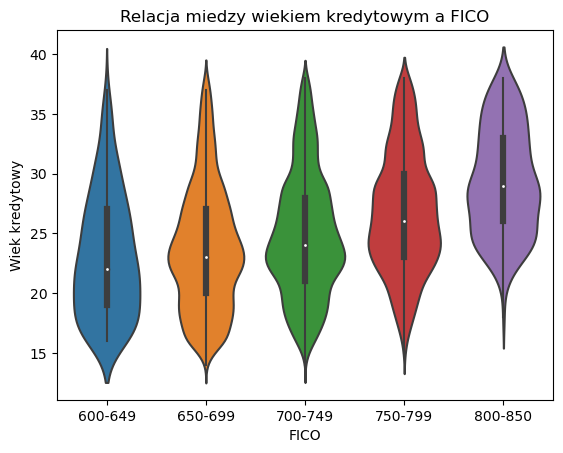

Chi-square: 2092.9148320439754
P-value: 0.0


In [19]:
#2 W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])
today_date = pd.to_datetime('01/06/2023')
loan_data['years_since_earliest_cr_line'] = (today_date - loan_data['earliest_cr_line']).dt.days / 365
loan_data['years_since_earliest_cr_line'] = loan_data['years_since_earliest_cr_line'].round()
loan_data['fico_group'] = pd.cut(loan_data['fico_range_high'], bins=[600, 650, 700, 750, 800, 850],
                                 labels=['600-649', '650-699', '700-749', '750-799', '800-850'])
sns.violinplot(x='fico_group', y='years_since_earliest_cr_line', data=loan_data)
plt.xlabel('FICO')
plt.ylabel('Wiek kredytowy')
plt.title('Relacja miedzy wiekiem kredytowym a FICO')
plt.show()

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])
today_date = pd.to_datetime('01/06/2023')
loan_data['years_since_earliest_cr_line'] = (today_date - loan_data['earliest_cr_line']).dt.days / 365
loan_data['years_since_earliest_cr_line'] = loan_data['years_since_earliest_cr_line'].round()
loan_data['fico_group'] = pd.cut(loan_data['fico_range_high'], bins=[600, 650, 700, 750, 800, 850],
                                 labels=['600-649', '650-699', '700-749', '750-799', '800-850'])
contingency_table = pd.crosstab(loan_data['fico_group'], loan_data['years_since_earliest_cr_line'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square:", chi2)
print("P-value:", p_value)

#Chi-square: 2092.9148320439754
#P-value: 0.0

# Wynik testu chi-kwadrat oraz bardzo niska p-wartość wskazują na istotną statystycznie zależność między tymi zmiennymi.
# Istnieje istotna zależność między wiekiem kredytowym a prawdopodobieństwem niewykonania zobowiązania.
# Ponieważ wynik testu chi-kwadrat z poprzedniego zadania był niski, możliwe jest, że zarówno wiek kredytowy, jak i wyniki FICO są silnie związane z prawdopodobieństwem spłacenia pożyczki. 
# Oznacza to, że obie zmienne mogą oddzielnie lub razem wpływać na zdolność pożyczkobiorców do spłaty zobowiązań.

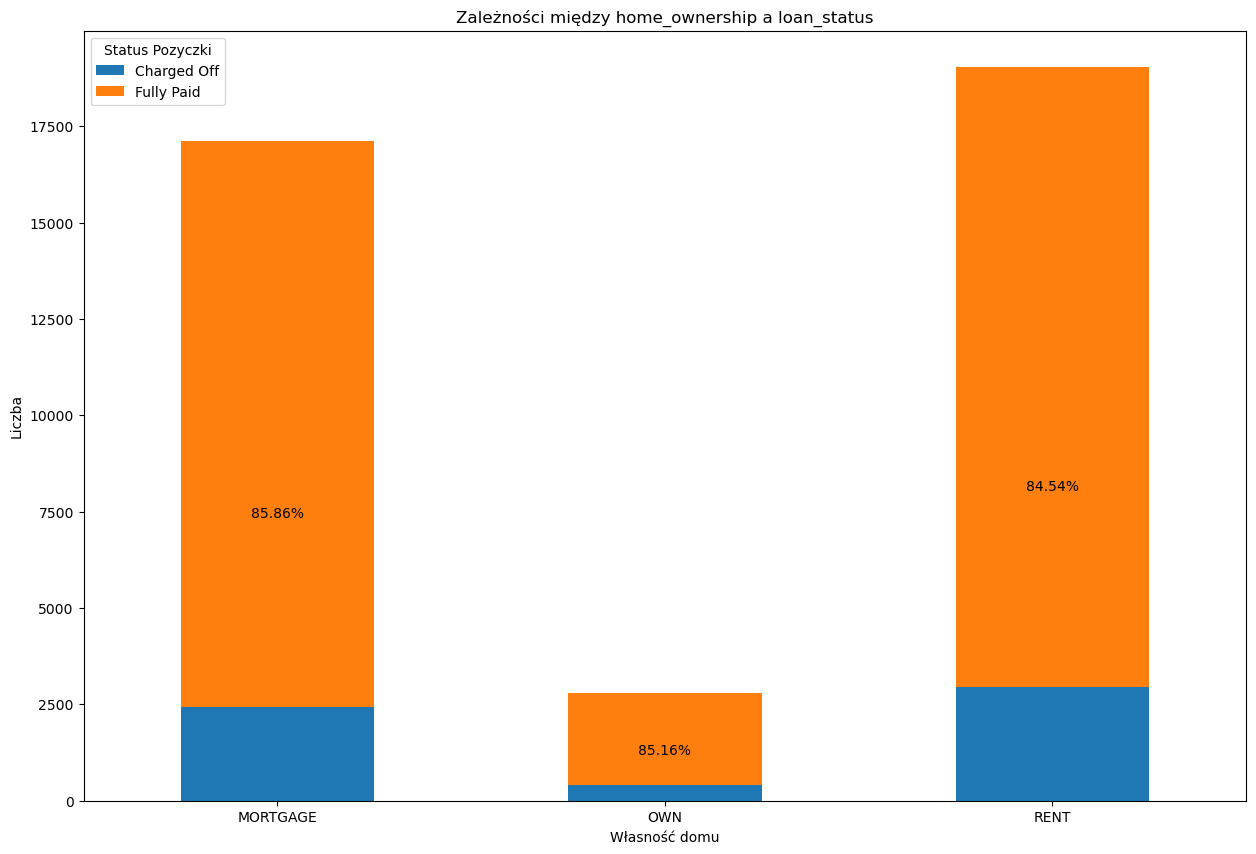

Chi-square: 12.354875481650627
P-value: 0.0020757396295723062


In [20]:
#3 W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

loan_data = pd.read_csv('finalnaDB.csv')
filtered_df = loan_data[~loan_data['home_ownership'].isin(['OTHER', 'NONE'])]
grouped_data = filtered_df.groupby(['home_ownership', 'loan_status']).size().unstack()
fully_paid_percent = (grouped_data['Fully Paid'] / grouped_data.sum(axis=1)) * 100
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 10))
ax.legend(title='Status Pozyczki')
for i, val in enumerate(fully_paid_percent):
    ax.text(i, grouped_data.loc[grouped_data.index[i], 'Fully Paid'] / 2, f'{val:.2f}%', ha='center')
plt.xlabel('Własność domu')
plt.ylabel('Liczba')
plt.title('Zależności między home_ownership a loan_status')
plt.xticks(rotation=0)
plt.show()

from scipy.stats import chi2_contingency
loan_data = pd.read_csv('finalnaDB.csv')
filtered_df = loan_data[~loan_data['home_ownership'].isin(['OTHER', 'NONE'])]
grouped_data = filtered_df.groupby(['home_ownership', 'loan_status']).size().unstack()
chi2, p_value, _, _ = chi2_contingency(grouped_data)
print("Chi-square:", chi2)
print("P-value:", p_value)

#Chi-square: 12.354875481650627
#P-value: 0.0020757396295723062
# Wynik testu chi-kwadrat oraz p-wartość wskazują na istotną statystycznie zależność między zmiennymi 'home_ownership', 'loan_status'.
# Rodzaj posiadania nieruchomości wydaje się mieć wpływ na to, czy pożyczki są spłacane czy nie i może być użytecznym wskaźnikiem przy ocenie ryzyka kredytowego.

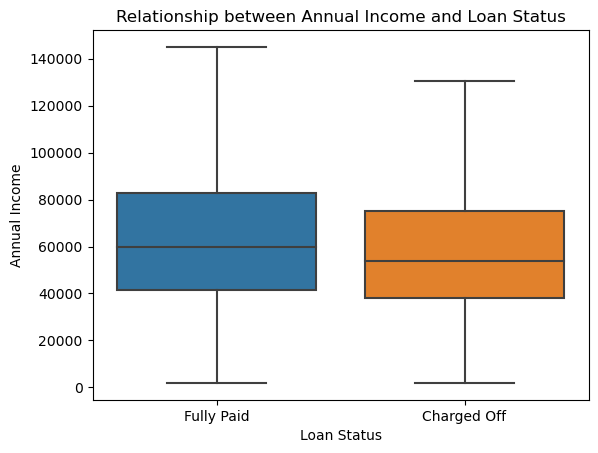

T-statistic: 8.243866034069642
P-value: 1.8809807507941504e-16


In [21]:
#4 W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

loan_data = pd.read_csv('finalnaDB.csv')
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data, showfliers=False)
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Relationship between Annual Income and Loan Status')
plt.show()

loan_data = pd.read_csv('finalnaDB.csv')
fully_paid = loan_data[loan_data['loan_status'] == 'Fully Paid']['annual_inc']
charged_off = loan_data[loan_data['loan_status'] == 'Charged Off']['annual_inc']
t_statistic, p_value = stats.ttest_ind(fully_paid, charged_off, equal_var=False)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

#T-statistic: 8.243866034069642
#P-value: 1.8809807507941504e-16

# Istnieje istotna statystycznie różnica w rocznych dochodach między grupą pożyczek spłaconych w pełni a grupą pożyczek niespłaconych. 
# Oznacza to, że osoby, które spłaciły pożyczki, mają tendencję do wyższego rocznego dochodu w porównaniu z osobami, które nie spłaciły pożyczek.
# Jednakże, wartości T-statistic i P-value same w sobie nie mówią nam o kierunku związku ani o tym, czy różnica w dochodach jest wystarczająco duża, aby miała znaczenie praktyczne.

In [2]:
#5 W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

loan_data = pd.read_csv('finalnaDB.csv')
grouped_data = filtered_df.groupby('emp_length')['loan_status'].apply(lambda x: (x == 'Charged Off').mean() * 100).reset_index()
grouped_data = grouped_data.sort_values(by='loan_status')
plt.figure(figsize=(12, 6))
sns.barplot(x='emp_length', y='loan_status', data=grouped_data)
plt.xlabel('Dlugosc zatrudnienia')
plt.ylabel('Niesplacone pozyczki w (%)')
plt.title('Zaleznosc miedzy Dlugosc zatrudnienia a Niesplacone pozyczki w (%)')
plt.xticks(rotation=45)
plt.show()

import pandas as pd
import scipy.stats as stats
loan_data = pd.read_csv('finalnaDB.csv')
contingency_table = pd.crosstab(filtered_df['annual_inc'], filtered_df['loan_status'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square Test:")
print("Chi-square:", chi2)
print("P-value:", p_value)

#Chi-square: 5272.006336957424
#P-value: 0.014844664048700608

# Osoby zatrudnione przez 2 lata lub 9 wykazują tendencję do największej spłacalności swoich zobowiązań finansowych.
# Dla pierwszej grupy może być to związane z ugruntowaniem swojej pozycji w nowym miejscu pracy i wzrostem wynagrodzenia.
# Dla drugiej grupy może być to związane z chęcią zmiany kariery i próbą uregulowania swoich zobowiązań finansowych tzw. świeży start.
# Począwszy od lat zatrudnienia 3 spłacalnośc pożyczek maleje by uzyskać peak w 7 roku zatrudnienia.
# Największą niewypłacalnością cechują się osoby dopiero co zatrudnione (1 rok) i z długością zatrudnienia równą 10 lat.
# W pierwszym przypadku może być to spowodowane tym, że osoby dla przykłądu nie miały przedłużonej umowy po okresie próbnym i ich dochody drastycznie spadły.
# Dla osób z zatrudnieniem 10 lat możemy przypuszczać, że doszło do tzw. wypalenia zawodowego, zmiany kariery, ograniczenia dochodu przy jednoczesnych wysokich zobowiązaniach finansowych.

NameError: name 'filtered_df' is not defined

Chi-square Test:
Chi-square: 1290.891251027271
P-value: 1.8143765771720488e-18


<Figure size 3000x4500 with 0 Axes>

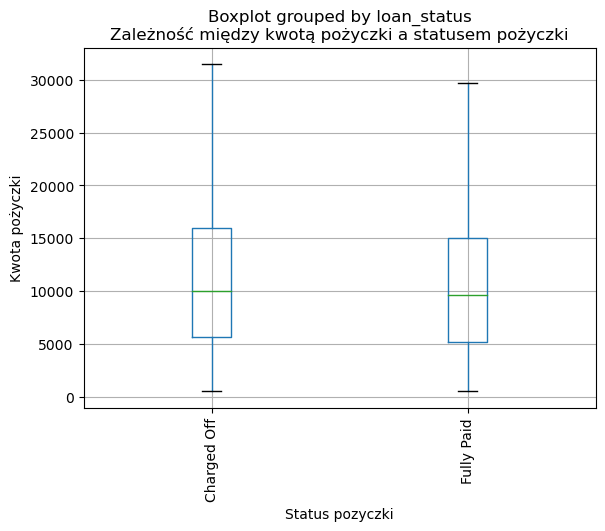

In [23]:
#6 Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

import pandas as pd
import matplotlib.pyplot as plt
loan_data = pd.read_csv('finalnaDB.csv')
plt.figure(figsize=(30, 45))
loan_data.boxplot(column='loan_amnt', by='loan_status', showfliers=False)
plt.xlabel('Status pozyczki')
plt.ylabel('Kwota pożyczki')
plt.title('Zależność między kwotą pożyczki a statusem pożyczki')
plt.xticks(rotation=90)

import pandas as pd
import scipy.stats as stats
loan_data = pd.read_csv('finalnaDB.csv')
contingency_table = pd.crosstab(filtered_df['loan_amnt'], filtered_df['loan_status'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square Test:")
print("Chi-square:", chi2)
print("P-value:", p_value)

#Chi-square: 1290.891251027271
#P-value: 1.8143765771720488e-18
# Istnieje związek między wielkością pożyczki a prawdopodobieństwem niewykonania zobowiązania. 
# Wartości 'p-value' sugeruje, że związek między wielkością pożyczki a prawdopodobieństwem niewykonania zobowiązania może nie być tak jednoznaczny lub może być bardziej złożony niż prosty związek przyczynowo-skutkowy.

In [19]:
#3 Feature Engineering – utwórz 20 nowych zmiennych

# Komentarz:
# 1 - na podstawie przykładowej bazy danych chciałem sprawdzić, czy będę w stanie zauważyć cechy 'idealnego pożyczkobiorcy'.
# 2 - z poniższych wyników wydaje się, że 
# a) kwota pożyczki nie może przekroczyć 27% rocznego dochodu,
# b) musi być udzielona na 36 miesięcy
# c) pożyczkobiorca musi mieć za sobą minimum 5-6 lat zatrudnienia (największa ilość spłaconych pożyczek jest w 'emp_lenght' = 9)
# d) lub jako alternatywa pożyczka może być udzielona w drugim roku od podjęcia pracy
# e) tzw. 'grade' musi oscylować między A i B natomiast status weryfikacji pożyczkobiorcy oraz 'dti' nie wydaje się, by miały większy wpływ na status spłaty pożyczki
# f) osoby już posiadające kredyt na nieruchomość najczęściej spłacają swoje zobowiązania finansowe
# g) pożyczka na zakup samochodu, ślub, oraz zakup nieruchomości (major_purchase) są najczęściej spłacane
# h) w przeciwieństwie do pożyczek na edukacje, small_business i renewable_energy
# i) orpocentowanie pożyczki winno oscylować między 5-6 % a FICO minimum 'GOOD'



In [20]:
# 1.Średnia jak dużą część dochodu rocznego stanowiła pożyczka

import pandas as pd
loan_data = pd.read_csv('finalnaDB.csv')
columns_to_analyze = ['annual_inc', 'loan_amnt']
selected_data = loan_data[columns_to_analyze].dropna()
correlation_matrix = selected_data.corr()
print(correlation_matrix)

            annual_inc  loan_amnt
annual_inc    1.000000   0.273317
loan_amnt     0.273317   1.000000


In [76]:
# 2.Średnia jak dużą część dochodu rocznego stanowiła pożyczka w zależności od statusu spłaty

import pandas as pd
loan_data = pd.read_csv('finalnaDB.csv')
fully_paid_data = loan_data[loan_data['loan_status'] == 'Fully Paid']
fully_paid_corr = fully_paid_data['annual_inc'].corr(fully_paid_data['loan_amnt'])
charged_off_data = loan_data[loan_data['loan_status'] == 'Charged Off']
charged_off_corr = charged_off_data['annual_inc'].corr(charged_off_data['loan_amnt'])

print("Korelacja dla Fully Paid:", round(fully_paid_corr, 2))
print("Korelacja dla Charged Off:", round(charged_off_corr, 2))

Korelacja dla Fully Paid: 0.27
Korelacja dla Charged Off: 0.36


In [86]:
# 3.Liczba pożyczek spłaconych i niespłaconych dla każdego roku zatrudnienia

import pandas as pd
loan_data = pd.read_csv('finalnaDB.csv')
emp_lengths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fully_paid_counts = {length: 0 for length in emp_lengths}
charged_off_counts = {length: 0 for length in emp_lengths}

for length in emp_lengths:
    fully_paid_counts[length] = len(loan_data[(loan_data['emp_length'] == length) & (loan_data['loan_status'] == 'Fully Paid')])
    charged_off_counts[length] = len(loan_data[(loan_data['emp_length'] == length) & (loan_data['loan_status'] == 'Charged Off')])

print("Ilość pożyczek Fully Paid w zależności od lata zatrudnienia:", fully_paid_counts)
print("Ilość pożyczek Charged Off w zależności od lata zatrudnienia:", charged_off_counts)

Ilość pożyczek Fully Paid w zależności od lata zatrudnienia: {1: 7013, 2: 3943, 3: 3613, 4: 3007, 5: 2821, 6: 1929, 7: 1511, 8: 1282, 9: 1103, 10: 7033}
Ilość pożyczek Charged Off w zależności od lata zatrudnienia: {1: 1224, 2: 621, 3: 604, 4: 497, 5: 475, 6: 338, 7: 277, 8: 222, 9: 170, 10: 1377}


In [88]:
# 4.Jaki procent pożyczek został spłacony lub niespłacony dla każdego roku zatrudnienia

import pandas as pd
loan_data = pd.read_csv('finalnaDB.csv')
emp_length_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

results = {'emp_length': [], 'fully_paid_%': [], 'charged_off_%': []}

for length in emp_length_values:
    fully_paid_count = len(loan_data[(loan_data['emp_length'] == length) & (loan_data['loan_status'] == 'Fully Paid')])
    charged_off_count = len(loan_data[(loan_data['emp_length'] == length) & (loan_data['loan_status'] == 'Charged Off')])
    
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    
    results['emp_length'].append(length)
    results['fully_paid_%'].append(round(fully_paid_percent, 2))
    results['charged_off_%'].append(round(charged_off_percent, 2))

results_df = pd.DataFrame(results)

print(results_df)

   emp_length  fully_paid_%  charged_off_%
0           1         85.14          14.86
1           2         86.39          13.61
2           3         85.68          14.32
3           4         85.82          14.18
4           5         85.59          14.41
5           6         85.09          14.91
6           7         84.51          15.49
7           8         85.24          14.76
8           9         86.65          13.35
9          10         83.63          16.37


In [89]:
# 5.Jaki procent pożyczek został spłacony lub niespłacony dla statusu weryfikacji przez pożyczkodawcę

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')

results = {'loan_status': [], 'verification_status': [], 'procent': []}

for loan_status in ['Fully Paid', 'Charged Off']:
    for verification_status in ['Verified', 'Not Verified']:
        filtered_data = loan_data[(loan_data['loan_status'] == loan_status) & (loan_data['verification_status'] == verification_status)]
        total_loans = len(filtered_data)
        percent = (total_loans / len(loan_data)) * 100
        results['loan_status'].append(loan_status)
        results['verification_status'].append(verification_status)
        results['procent'].append(round(percent, 2))

results_df = pd.DataFrame(results)
print(results_df)


   loan_status verification_status  procent
0   Fully Paid            Verified    46.90
1   Fully Paid        Not Verified    38.24
2  Charged Off            Verified     8.75
3  Charged Off        Not Verified     6.11


In [90]:
# 6.Procent pożyczek spłaconych i niespłaconych dla każdej wartości w kolumnie 'grade'

import pandas as pd
loan_data = pd.read_csv('finalnaDB.csv')

grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

results = {'grade': [], 'fully_paid_%': [], 'charged_off_%': []}

for grade in grades:
    fully_paid_count = len(loan_data[(loan_data['grade'] == grade) & (loan_data['loan_status'] == 'Fully Paid')])
    charged_off_count = len(loan_data[(loan_data['grade'] == grade) & (loan_data['loan_status'] == 'Charged Off')])
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    results['grade'].append(grade)
    results['fully_paid_%'].append(round(fully_paid_percent))
    results['charged_off_%'].append(round(charged_off_percent))
results_df = pd.DataFrame(results)

print(results_df)

  grade  fully_paid_%  charged_off_%
0     A            94              6
1     B            88             12
2     C            83             17
3     D            78             22
4     E            74             26
5     F            68             32
6     G            66             34


In [26]:
# 7.Jaki procent stanowiły pożyczki udzielone dla każdej wartości w kolumnie 'grade' w porównaniu do całkowitej ilości udzielonych pożyczek

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
grade_counts = loan_data['grade'].value_counts()
total_loans = len(loan_data)
percentage_results = {}
for grade, count in grade_counts.items():
    percentage = (count / total_loans) * 100
    percentage_results[grade] = percentage
for grade, percentage in percentage_results.items():
    print(f"{grade}: {percentage:.2f}%")

B: 29.14%
A: 23.27%
C: 20.77%
D: 14.36%
E: 8.10%
F: 3.15%
G: 1.22%


In [91]:
# 8.Procent pożyczkobiorców zweryfikowanych lub nie dla każdej wartości w kolumnie 'grade'

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
results = {'grade': [], 'verified_%': [], 'not_verified_%': []}
for grade in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    verified_count = len(loan_data[(loan_data['grade'] == grade) & (loan_data['verification_status'] == 'Verified')])
    not_verified_count = len(loan_data[(loan_data['grade'] == grade) & (loan_data['verification_status'] == 'Not Verified')])
    total_loans = verified_count + not_verified_count
    verified_percent = (verified_count / total_loans) * 100
    not_verified_percent = (not_verified_count / total_loans) * 100
    results['grade'].append(grade)
    results['verified_%'].append(round(verified_percent))
    results['not_verified_%'].append(round(not_verified_percent))

results_df = pd.DataFrame(results)

print(results_df)

  grade  verified_%  not_verified_%
0     A          48              52
1     B          54              46
2     C          54              46
3     D          60              40
4     E          69              31
5     F          74              26
6     G          68              32


In [92]:
# 9.Jaki procent pożyczek został spłacony lub nie dla 'home_ownership' = 'MORTGAGE', 'OWN', 'RENT' (wykluczenie OTHER i NONE gdyż to tylko 135 rekordów)

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_data = loan_data[loan_data['home_ownership'].isin(['MORTGAGE', 'OWN', 'RENT'])] 
results = {'home_ownership': [], 'fully_paid_procent': [], 'charged_off_procent': []}
for ownership in ['MORTGAGE', 'OWN', 'RENT']:
    fully_paid_count = len(loan_data[(loan_data['home_ownership'] == ownership) & (loan_data['loan_status'] == 'Fully Paid')])
    charged_off_count = len(loan_data[(loan_data['home_ownership'] == ownership) & (loan_data['loan_status'] == 'Charged Off')])
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    results['home_ownership'].append(ownership)
    results['fully_paid_procent'].append(round(fully_paid_percent, 2))
    results['charged_off_procent'].append(round(charged_off_percent, 2))
results_df = pd.DataFrame(results)

print(results_df)

  home_ownership  fully_paid_procent  charged_off_procent
0       MORTGAGE               85.86                14.14
1            OWN               85.16                14.84
2           RENT               84.54                15.46


In [64]:
# 10.Procent pożyczek spłaconych lub nie w zależności od długości trwania spłat (36 lub 60 miesięcy).

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
results = {'term': [], 'fully_paid_percent': [], 'charged_off_percent': []}
for term in [36, 60]:
    fully_paid_count = len(loan_data[(loan_data['term'] == term) & (loan_data['loan_status'] == 'Fully Paid')])
    charged_off_count = len(loan_data[(loan_data['term'] == term) & (loan_data['loan_status'] == 'Charged Off')])
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    results['term'].append(term)
    results['fully_paid_percent'].append(round(fully_paid_percent))
    results['charged_off_percent'].append(round(charged_off_percent))
results_df = pd.DataFrame(results)

print(results_df)

   term  fully_paid_percent  charged_off_percent
0    36                  88                   12
1    60                  77                   23


In [58]:
# 11. Procent pożyczek spłaconych lub nie w zależności od powodu dla ktrego kredyt został zaciągnięty 'purpose'

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
results = {'purpose': [], 'fully_paid_percent': [], 'charged_off_percent': []}
grouped_data = loan_data.groupby('purpose')
for purpose, group in grouped_data:
    fully_paid_count = len(group[group['loan_status'] == 'Fully Paid'])
    charged_off_count = len(group[group['loan_status'] == 'Charged Off'])
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    results['purpose'].append(purpose)
    results['fully_paid_percent'].append(round(fully_paid_percent))
    results['charged_off_percent'].append(round(charged_off_percent))
results_df = pd.DataFrame(results)

print(results_df)

               purpose  fully_paid_percent  charged_off_percent
0                  car                  89                   11
1          credit_card                  89                   11
2   debt_consolidation                  85                   15
3          educational                  80                   20
4     home_improvement                  87                   13
5                house                  82                   18
6       major_purchase                  90                   10
7              medical                  83                   17
8               moving                  84                   16
9                other                  83                   17
10    renewable_energy                  81                   19
11      small_business                  73                   27
12            vacation                  85                   15
13             wedding                  90                   10


In [57]:
# 12a. FICO range (średnia wartość na podstawie 'fico_range_low' i 'fico_range_high') a status spłaty pożyczki w %

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['average_fico'] = (loan_data['fico_range_low'] + loan_data['fico_range_high']) / 2
fico_ranges = {
    'fico_range_poor': (0, 579),
    'fico_range_fair': (580, 669),
    'fico_range_good': (670, 739),
    'fico_range_very_good': (740, 799),
    'fico_range_exceptional': (800, float('inf'))
}

def assign_fico_range(row):
    for range_name, (lower, upper) in fico_ranges.items():
        if lower <= row['average_fico'] <= upper:
            return range_name
loan_data['fico_range'] = loan_data.apply(assign_fico_range, axis=1)
results = {'fico_range': [], 'fully_paid_percent': [], 'charged_off_percent': []}
grouped_data = loan_data.groupby('fico_range')
for fico_range, group in grouped_data:
    fully_paid_count = len(group[group['loan_status'] == 'Fully Paid'])
    charged_off_count = len(group[group['loan_status'] == 'Charged Off'])
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    results['fico_range'].append(fico_range)
    results['fully_paid_percent'].append(round(fully_paid_percent))
    results['charged_off_percent'].append(round(charged_off_percent))
results_df = pd.DataFrame(results)

print(results_df)

               fico_range  fully_paid_percent  charged_off_percent
0  fico_range_exceptional                  95                    5
1         fico_range_fair                  76                   24
2         fico_range_good                  84                   16
3    fico_range_very_good                  92                    8


In [56]:
# 12b. FICO range (średnia wartość na podstawie 'last_fico_range_low' i 'last_fico_range_high') a status spłaty pożyczki w %

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['average_fico'] = (loan_data['last_fico_range_low'] + loan_data['last_fico_range_high']) / 2
fico_ranges = {
    'fico_range_poor': (0, 579),
    'fico_range_fair': (580, 669),
    'fico_range_good': (670, 739),
    'fico_range_very_good': (740, 799),
    'fico_range_exceptional': (800, float('inf'))
}

def assign_fico_range(row):
    for range_name, (lower, upper) in fico_ranges.items():
        if lower <= row['average_fico'] <= upper:
            return range_name
loan_data['fico_range'] = loan_data.apply(assign_fico_range, axis=1)
results = {'fico_range': [], 'fully_paid_percent': [], 'charged_off_percent': []}
grouped_data = loan_data.groupby('fico_range')
for fico_range, group in grouped_data:
    fully_paid_count = len(group[group['loan_status'] == 'Fully Paid'])
    charged_off_count = len(group[group['loan_status'] == 'Charged Off'])
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    results['fico_range'].append(fico_range)
    results['fully_paid_percent'].append(round(fully_paid_percent))
    results['charged_off_percent'].append(round(charged_off_percent))
results_df = pd.DataFrame(results)

print(results_df)

               fico_range  fully_paid_percent  charged_off_percent
0  fico_range_exceptional                  99                    1
1         fico_range_fair                  71                   29
2         fico_range_good                  94                    6
3         fico_range_poor                  51                   49
4    fico_range_very_good                  99                    1


In [33]:
# 13a. Jaki procent wszystkich pożyczkobiorców nalezy do poszczególnych przedziałów FICO (na podstawie średniej z kolumn 'fico_range_low' i 'fico_range_high')

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['average_fico'] = (loan_data['fico_range_low'] + loan_data['fico_range_high']) / 2
fico_ranges = {
    'fico_range_poor': (0, 579),
    'fico_range_fair': (580, 669),
    'fico_range_good': (670, 739),
    'fico_range_very_good': (740, 799),
    'fico_range_exceptional': (800, float('inf'))
}

def assign_fico_range(row):
    for range_name, (lower, upper) in fico_ranges.items():
        if lower <= row['average_fico'] <= upper:
            return range_name
loan_data['fico_range'] = loan_data.apply(assign_fico_range, axis=1)
grouped_data = loan_data.groupby('fico_range')
total_loans = len(loan_data)
percentage_results = {}
for fico_range, group in grouped_data:
    group_size = len(group)
    percentage = (group_size / total_loans) * 100
    percentage_results[fico_range] = percentage
for fico_range, percentage in percentage_results.items():
    print(f"{fico_range}: {percentage:.2f}%")


fico_range_exceptional: 1.21%
fico_range_fair: 9.44%
fico_range_good: 66.43%
fico_range_very_good: 22.92%


In [34]:
# 13b. Jaki procent wszystkich pożyczkobiorców nalezy do poszczególnych przedziałów FICO (na podstawie średniej z kolumn 'last_fico_range_low' i 'last_fico_range_high' dla każdego wiersza)

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['average_fico'] = (loan_data['last_fico_range_low'] + loan_data['last_fico_range_high']) / 2
fico_ranges = {
    'fico_range_poor': (0, 579),
    'fico_range_fair': (580, 669),
    'fico_range_good': (670, 739),
    'fico_range_very_good': (740, 799),
    'fico_range_exceptional': (800, float('inf'))
}

def assign_fico_range(row):
    for range_name, (lower, upper) in fico_ranges.items():
        if lower <= row['average_fico'] <= upper:
            return range_name
loan_data['fico_range'] = loan_data.apply(assign_fico_range, axis=1)
grouped_data = loan_data.groupby('fico_range')
total_loans = len(loan_data)
percentage_results = {}
for fico_range, group in grouped_data:
    group_size = len(group)
    percentage = (group_size / total_loans) * 100
    percentage_results[fico_range] = percentage
for fico_range, percentage in percentage_results.items():
    print(f"{fico_range}: {percentage:.2f}%")

fico_range_exceptional: 5.77%
fico_range_fair: 24.27%
fico_range_good: 36.88%
fico_range_poor: 11.38%
fico_range_very_good: 21.70%


In [35]:
# 14a. Średnia wartość FICO (dla 'fico_range_low' i 'fico_range_high') wobec 'grade'

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['avg_fico'] = (loan_data['fico_range_low'] + loan_data['fico_range_high']) / 2
grade_sum = {}
grade_count = {}

for index, row in loan_data.iterrows():
    grade = row['grade']
    avg_fico = row['avg_fico']
    
    if grade not in grade_sum:
        grade_sum[grade] = 0
        grade_count[grade] = 0
    
    grade_sum[grade] += avg_fico
    grade_count[grade] += 1

average_fico_by_grade = {}
for grade, sum_fico in grade_sum.items():
    count = grade_count[grade]
    average_fico = sum_fico / count
    average_fico_by_grade[grade] = round(average_fico)
    
for grade, average_fico in average_fico_by_grade.items():
    print(f"Grade {grade}: Average FICO: {average_fico}")

Grade B: Average FICO: 722
Grade C: Average FICO: 700
Grade A: Average FICO: 753
Grade E: Average FICO: 681
Grade F: Average FICO: 675
Grade D: Average FICO: 687
Grade G: Average FICO: 667


In [36]:
# 14b. Średnia wartość FICO (dla 'last_fico_range_low' i 'last_fico_range_high') wobec 'grade'

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['avg_fico'] = (loan_data['last_fico_range_low'] + loan_data['last_fico_range_high']) / 2
grade_sum = {}
grade_count = {}

for index, row in loan_data.iterrows():
    grade = row['grade']
    avg_fico = row['avg_fico']
    
    if grade not in grade_sum:
        grade_sum[grade] = 0
        grade_count[grade] = 0
    
    grade_sum[grade] += avg_fico
    grade_count[grade] += 1

average_fico_by_grade = {}
for grade, sum_fico in grade_sum.items():
    count = grade_count[grade]
    average_fico = sum_fico / count
    average_fico_by_grade[grade] = round(average_fico)
    
for grade, average_fico in average_fico_by_grade.items():
    print(f"Grade {grade}: Average FICO: {average_fico}")

Grade B: Average FICO: 691
Grade C: Average FICO: 666
Grade A: Average FICO: 724
Grade E: Average FICO: 647
Grade F: Average FICO: 643
Grade D: Average FICO: 655
Grade G: Average FICO: 646


In [55]:
# 15. Jaki procent pożyczek został spłacony lub nie dla poszczególnego oprocentowania pożyczki 'int_rate'

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
int_rates = [5, 6, 7, 8, 9, 10]
results = {'int_rate': [], 'fully_paid_percent': [], 'charged_off_percent': []}
for int_rate in int_rates:
    fully_paid_count = len(loan_data[(loan_data['int_rate'] == int_rate) & (loan_data['loan_status'] == 'Fully Paid')])
    charged_off_count = len(loan_data[(loan_data['int_rate'] == int_rate) & (loan_data['loan_status'] == 'Charged Off')])
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    results['int_rate'].append(int_rate)
    results['fully_paid_percent'].append(round(fully_paid_percent))
    results['charged_off_percent'].append(round(charged_off_percent))

results_df = pd.DataFrame(results)

print(results_df)

   int_rate  fully_paid_percent  charged_off_percent
0         5                  97                    3
1         6                  97                    3
2         7                  94                    6
3         8                  93                    7
4         9                  92                    8
5        10                  90                   10


In [46]:
# 16. Ile pożyczek udzielono w zależności od procentowego rocznego zobowiązania (miesięczne raty x12) wobec rocznego dochodu 

import pandas as pd


loan_data = pd.read_csv('finalnaDB.csv')
loan_data['installment'] = loan_data['installment'] * 12
loan_data['installment_to_income_percent'] = (loan_data['installment'] / loan_data['annual_inc']) * 100
loan_data['installment_to_income_percent'] = loan_data['installment_to_income_percent'].round().astype(int)
percentage_counts = loan_data['installment_to_income_percent'].value_counts().sort_index()
percentage_counts_filtered = percentage_counts[percentage_counts >= 1]

for percent, count in percentage_counts_filtered.items():
    print(f"Procent: {percent}%, Ilość: {count}")

Procent: 0%, Ilość: 96
Procent: 1%, Ilość: 1719
Procent: 2%, Ilość: 3569
Procent: 3%, Ilość: 4282
Procent: 4%, Ilość: 4485
Procent: 5%, Ilość: 4294
Procent: 6%, Ilość: 3889
Procent: 7%, Ilość: 3345
Procent: 8%, Ilość: 2864
Procent: 9%, Ilość: 2363
Procent: 10%, Ilość: 1923
Procent: 11%, Ilość: 1505
Procent: 12%, Ilość: 1220
Procent: 13%, Ilość: 970
Procent: 14%, Ilość: 761
Procent: 15%, Ilość: 546
Procent: 16%, Ilość: 424
Procent: 17%, Ilość: 243
Procent: 18%, Ilość: 173
Procent: 19%, Ilość: 141
Procent: 20%, Ilość: 87
Procent: 21%, Ilość: 51
Procent: 22%, Ilość: 35
Procent: 23%, Ilość: 27
Procent: 24%, Ilość: 12
Procent: 25%, Ilość: 11
Procent: 26%, Ilość: 4
Procent: 27%, Ilość: 5
Procent: 28%, Ilość: 4
Procent: 29%, Ilość: 4
Procent: 30%, Ilość: 2
Procent: 32%, Ilość: 1
Procent: 33%, Ilość: 1
Procent: 34%, Ilość: 1
Procent: 41%, Ilość: 1
Procent: 43%, Ilość: 1
Procent: 54%, Ilość: 1


In [54]:
# 17. Status pożyczki w zależności od jaki procent rocznego dochodu stanowią raty (miesięczne x12)

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['installment'] = loan_data['installment'] * 12
loan_data['installment_to_income_percent'] = (loan_data['installment'] / loan_data['annual_inc']) * 100
loan_data['installment_to_income_percent'] = loan_data['installment_to_income_percent'].round().astype(int)
percentage_counts = loan_data['installment_to_income_percent'].value_counts().sort_index()

percentage_counts_filtered = percentage_counts[percentage_counts >= 0]

results = {'installment_to_income_percent': [], 'fully_paid_percent': [], 'charged_off_percent': []}

for percent in percentage_counts_filtered.index:
    fully_paid_count = len(loan_data[(loan_data['installment_to_income_percent'] == percent) & (loan_data['loan_status'] == 'Fully Paid')])
    charged_off_count = len(loan_data[(loan_data['installment_to_income_percent'] == percent) & (loan_data['loan_status'] == 'Charged Off')])
    total_loans = fully_paid_count + charged_off_count
    if total_loans > 0:
        fully_paid_percent = (fully_paid_count / total_loans) * 100
        charged_off_percent = (charged_off_count / total_loans) * 100
        results['installment_to_income_percent'].append(percent)
        results['fully_paid_percent'].append(round(fully_paid_percent))
        results['charged_off_percent'].append(round(charged_off_percent))

results_df = pd.DataFrame(results)

print(results_df)

    installment_to_income_percent  fully_paid_percent  charged_off_percent
0                               0                  97                    3
1                               1                  87                   13
2                               2                  88                   12
3                               3                  87                   13
4                               4                  87                   13
5                               5                  87                   13
6                               6                  86                   14
7                               7                  86                   14
8                               8                  84                   16
9                               9                  83                   17
10                             10                  82                   18
11                             11                  80                   20
12                       

In [52]:
# 18. Procent spłaconych pożyczek dla wartości w kolumnie 'dti'

import pandas as pd
loan_data = pd.read_csv('finalnaDB.csv')


dti_ranges = list(range(0, 31))
results = {'dti': [], 'fully_paid_percent': [], 'charged_off_percent': []}


for dti in dti_ranges:
    fully_paid_count = len(loan_data[(loan_data['dti'] == dti) & (loan_data['loan_status'] == 'Fully Paid')])
    charged_off_count = len(loan_data[(loan_data['dti'] == dti) & (loan_data['loan_status'] == 'Charged Off')])
    total_loans = fully_paid_count + charged_off_count
    fully_paid_percent = (fully_paid_count / total_loans) * 100
    charged_off_percent = (charged_off_count / total_loans) * 100
    results['dti'].append(dti)
    results['fully_paid_percent'].append(round(fully_paid_percent))
    results['charged_off_percent'].append(round(charged_off_percent))

results_df = pd.DataFrame(results)

print(results_df)

    dti  fully_paid_percent  charged_off_percent
0     0                  88                   12
1     1                  86                   14
2     2                  87                   13
3     3                  87                   13
4     4                  87                   13
5     5                  88                   12
6     6                  88                   12
7     7                  88                   12
8     8                  87                   13
9     9                  86                   14
10   10                  87                   13
11   11                  86                   14
12   12                  85                   15
13   13                  84                   16
14   14                  84                   16
15   15                  85                   15
16   16                  84                   16
17   17                  84                   16
18   18                  84                   16
19   19             

In [93]:
# 19a. Liczba otwartych kont a liczba spłaconych lub nie pożyczek

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_statuses = ['Fully Paid', 'Charged Off']
results = {'open_acc': [], 'fully_paid_liczba': [], 'charged_off_liczba': []}
for open_acc_value in range(1, 48):
    filtered_data = loan_data[loan_data['open_acc'] == open_acc_value]
    fully_paid_count = 0
    charged_off_count = 0
    for loan_status in loan_statuses:
        status_count = len(filtered_data[filtered_data['loan_status'] == loan_status])
        if loan_status == 'Fully Paid':
            fully_paid_count = status_count
        else:
            charged_off_count = status_count
    results['open_acc'].append(open_acc_value)
    results['fully_paid_liczba'].append(fully_paid_count)
    results['charged_off_liczba'].append(charged_off_count)
results_df = pd.DataFrame(results)

print(results_df)


    open_acc  fully_paid_liczba  charged_off_liczba
0          1                 30                   9
1          2                497                 135
2          3               1240                 264
3          4               1970                 362
4          5               2712                 435
5          6               3351                 557
6          7               3384                 580
7          8               3353                 557
8          9               3114                 517
9         10               2645                 471
10        11               2292                 394
11        12               1896                 307
12        13               1611                 283
13        14               1203                 211
14        15                980                 182
15        16                782                 124
16        17                608                 108
17        18                439                  73
18        19

In [94]:
# 19b. Liczba otwartych kont a procent pożyczek spłaconych lub nie

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')
loan_statuses = ['Fully Paid', 'Charged Off']
results = {'open_acc': [], 'fully_paid_w%': [], 'charged_off_w%': []}

for open_acc_value in range(1, 48):
    filtered_data = loan_data[loan_data['open_acc'] == open_acc_value]
    fully_paid_count = 0
    charged_off_count = 0
    
    for loan_status in loan_statuses:
        status_count = len(filtered_data[filtered_data['loan_status'] == loan_status])
        if loan_status == 'Fully Paid':
            fully_paid_count = status_count
        else:
            charged_off_count = status_count
    
    total_loans = fully_paid_count + charged_off_count
    
    if total_loans > 0:
        fully_paid_percent = (fully_paid_count / total_loans) * 100
        charged_off_percent = (charged_off_count / total_loans) * 100
    else:
        fully_paid_percent = 0
        charged_off_percent = 0
    
    results['open_acc'].append(open_acc_value)
    results['fully_paid_w%'].append(round(fully_paid_percent))
    results['charged_off_w%'].append(round(charged_off_percent))
    
results_df = pd.DataFrame(results)
print(results_df)


    open_acc  fully_paid_w%  charged_off_w%
0          1             77              23
1          2             79              21
2          3             82              18
3          4             84              16
4          5             86              14
5          6             86              14
6          7             85              15
7          8             86              14
8          9             86              14
9         10             85              15
10        11             85              15
11        12             86              14
12        13             85              15
13        14             85              15
14        15             84              16
15        16             86              14
16        17             85              15
17        18             86              14
18        19             83              17
19        20             84              16
20        21             83              17
21        22             85     

In [85]:
# 20. W którym stanie procent spłaconych pożyczek jest największy a w któym najmnieszy

import pandas as pd

loan_data = pd.read_csv('finalnaDB.csv')

filtered_data = loan_data[loan_data['loan_status'].isin(['Fully Paid', 'Charged Off'])]
grouped_data = filtered_data.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')
pivot_table = grouped_data.pivot(index='addr_state', columns='loan_status', values='count')
pivot_table['total_loans'] = pivot_table['Fully Paid'] + pivot_table['Charged Off']
pivot_table['Fully_Paid_%'] = round((pivot_table['Fully Paid'] / pivot_table['total_loans']) * 100)
pivot_table['Charged_Off_%'] = round((pivot_table['Charged Off'] / pivot_table['total_loans']) * 100)

pivot_table_sorted = pivot_table.sort_values(by='Fully_Paid_%', ascending=False)

print(pivot_table_sorted)



loan_status  Charged Off  Fully Paid  total_loans  Fully_Paid_%  Charged_Off_%
addr_state                                                                    
WY                   3.0        78.0         81.0          96.0            4.0
DC                  17.0       193.0        210.0          92.0            8.0
KS                  30.0       247.0        277.0          89.0           11.0
DE                  14.0       112.0        126.0          89.0           11.0
ID                   1.0         8.0          9.0          89.0           11.0
AR                  30.0       210.0        240.0          88.0           12.0
CO                  97.0       693.0        790.0          88.0           12.0
NH                  21.0       149.0        170.0          88.0           12.0
AL                  52.0       381.0        433.0          88.0           12.0
VT                   7.0        49.0         56.0          88.0           12.0
MA                 164.0      1148.0       1312.0   

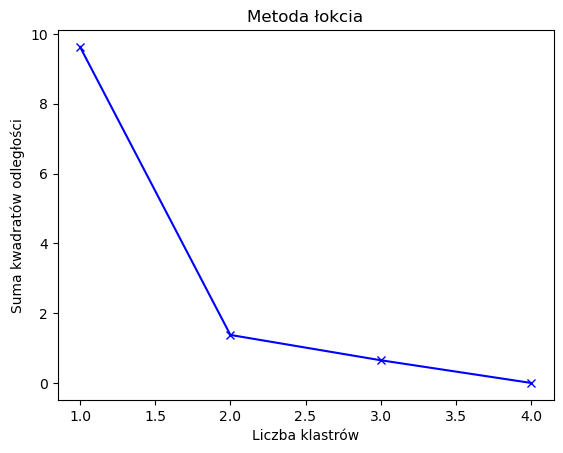

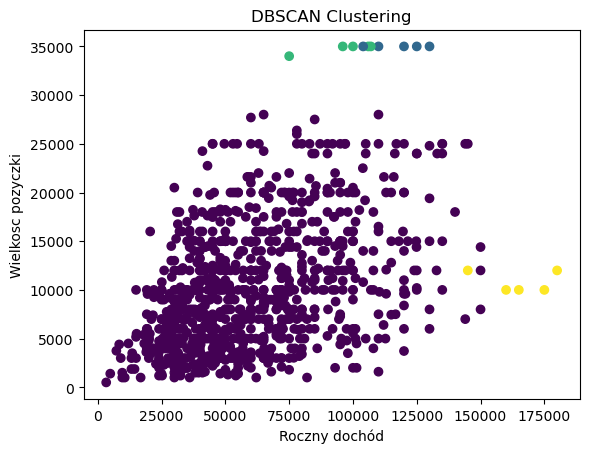

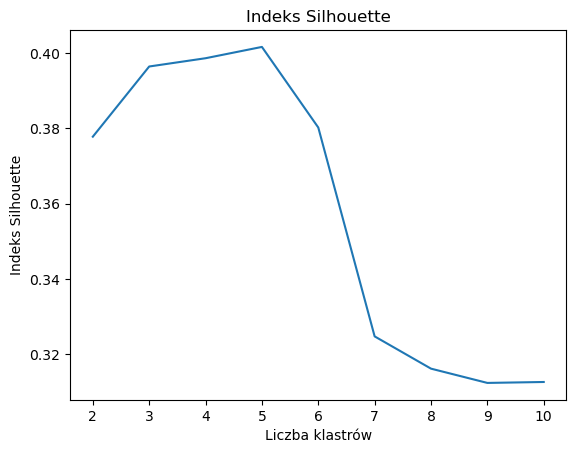

In [25]:
#4 Modelowanie

#1 Wykonaj klasteryzację danych (wypróbuj do tego celu kilka metod, min. 3) i sprawdź, czy występują jakieś segmenty pożyczkobiorców, wykorzystaj odpowiednie metody do określenia optymalnej liczby klastrów

# Metoda łokcia
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = np.array([[1.2, 3.5], [2.1, 4.2], [3.7, 1.9], [4.5, 2.8]])
sse = []
k_values = range(1, len(X)+1)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów odległości')
plt.title('Metoda łokcia')
plt.show()

# Optymalna liczba klastrów wynosi 2

# DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
loan_data = pd.read_csv('finalnaDB.csv')
features = ['annual_inc', 'loan_amnt', 'emp_length']
X = loan_data[features].values
np.random.seed(42)  
sample_indices = np.random.choice(len(X), size=1000, replace=False)
X_sampled = X[sample_indices]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
mask = dbscan_labels != -1  
plt.scatter(X_sampled[mask, 0], X_sampled[mask, 1], c=dbscan_labels[mask], cmap='viridis')
plt.xlabel('Roczny dochód')
plt.ylabel('Wielkosc pozyczki')
plt.title('DBSCAN Clustering')
plt.show()

# Indeks Silhouette
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
loan_data = pd.read_csv('finalnaDB.csv')
features = loan_data[['annual_inc', 'loan_amnt', 'emp_length']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
max_clusters = 10
silhouette_scores = []
for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))
plt.plot(range(2, max_clusters+1), silhouette_scores)
plt.xlabel('Liczba klastrów')
plt.ylabel('Indeks Silhouette')
plt.title('Indeks Silhouette')
plt.show()

In [26]:
#2 Wytrenuj 5 różnych modeli, wykorzystując do każdego inny algorytm, a następnie porównaj ich działanie, za metrykę oceny jakości modelu przyjmij AUROC score.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('finalnaDB.csv')
features = ['int_rate', 'fico_range_high', 'dti', 'term', 'annual_inc']
target = 'loan_status'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_pred)
    print(f'{name}: AUROC = {auroc:.4f}')

#Logistic Regression: AUROC = 0.6816
#Decision Tree: AUROC = 0.5230
#Random Forest: AUROC = 0.6207
#Support Vector Machine: AUROC = 0.4772
#Naive Bayes: AUROC = 0.6716

Logistic Regression: AUROC = 0.6816
Decision Tree: AUROC = 0.5230
Random Forest: AUROC = 0.6207
Support Vector Machine: AUROC = 0.4772
Naive Bayes: AUROC = 0.6716


In [29]:
#3 Sprawdź działanie wcześniej użytych metod na skompresowanych danych za pomocą PCA, porównaj wyniki (AUROC score) z modelami wytrenowanymi w poprzednim podpunkcie.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

data = pd.read_csv('finalnaDB.csv')
features = ['int_rate', 'fico_range_high', 'dti', 'term', 'annual_inc']
target = 'loan_status'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}
pca = PCA(n_components=2)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_pred)
    print(f'{name}: AUROC = {auroc:.4f}')
    
#Logistic Regression: AUROC = 0.6687
#Decision Tree: AUROC = 0.5253
#Random Forest: AUROC = 0.6105
#Support Vector Machine: AUROC = 0.5078
#Naive Bayes: AUROC = 0.6608


Logistic Regression: AUROC = 0.6687
Decision Tree: AUROC = 0.5253
Random Forest: AUROC = 0.6105
Support Vector Machine: AUROC = 0.5078
Naive Bayes: AUROC = 0.6608


In [30]:
#4 Zbuduj finalny model, którego AUROC score będzie >= 80%, pamiętaj o doborze istotnych zmiennych, kroswalidacji oraz dostrojeniu parametrów modelu, pomyśl również o zbalansowaniu klas.

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

loan_data = pd.read_csv('finalnaDB.csv')
selected_features = ['int_rate', 'fico_range_high', 'dti']
X = loan_data[selected_features]
y = loan_data['loan_status']
y = y.map({'Fully Paid': 0, 'Charged Off': 1})
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = RandomForestClassifier()
parameters = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
auroc = roc_auc_score(y_test, y_pred)
print("AUROC:", auroc)

#AUROC: 0.82


AUROC: 0.8194252843733333


<Figure size 2000x2000 with 0 Axes>

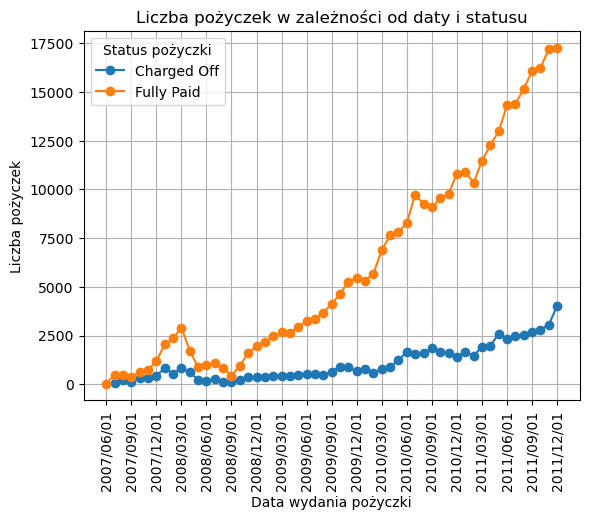

In [31]:
#====DODATKOWE WYKRESY====

#1
import pandas as pd
import matplotlib.pyplot as plt

loan_data = pd.read_csv('finalnaDB.csv')
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%Y/%m/%d')
loan_data['year_month'] = loan_data['issue_d'].dt.strftime('%Y/%m/%d')
filtered_df = loan_data[loan_data['loan_status'].isin(['Fully Paid', 'Charged Off'])]
loan_counts = filtered_df.groupby(['year_month', 'loan_status']).size().unstack()
loan_counts = loan_counts / 0.1
plt.figure(figsize=(20, 20))
loan_counts.plot(kind='line', marker='o')
xticks = range(0, len(loan_counts.index), 3)
xlabels = loan_counts.index[xticks]
plt.xticks(xticks, xlabels, rotation='vertical')
plt.xlabel('Data wydania pożyczki')
plt.ylabel('Liczba pożyczek')
plt.title('Liczba pożyczek w zależności od daty i statusu')
plt.legend(title='Status pożyczki')
plt.grid(True)
plt.show()

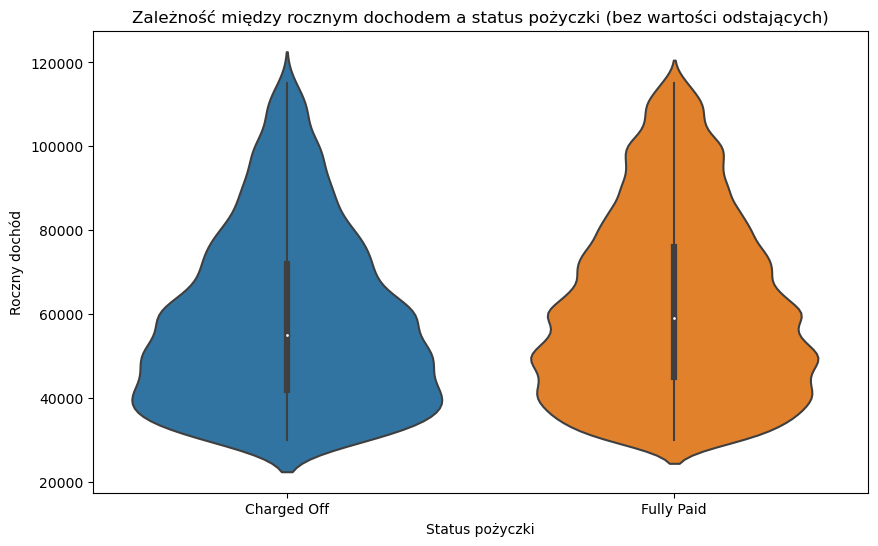

In [32]:
#2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
loan_data = pd.read_csv('finalnaDB.csv')
columns = ['annual_inc', 'loan_status']
lower_quantile = 0.1
upper_quantile = 0.9
filtered_data = loan_data.loc[(loan_data['annual_inc'] >= loan_data['annual_inc'].quantile(lower_quantile)) &
                              (loan_data['annual_inc'] <= loan_data['annual_inc'].quantile(upper_quantile))]
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_data, x='loan_status', y='annual_inc')
plt.title('Zależność między rocznym dochodem a status pożyczki (bez wartości odstających)')
plt.xlabel('Status pożyczki')
plt.ylabel('Roczny dochód')
plt.show()

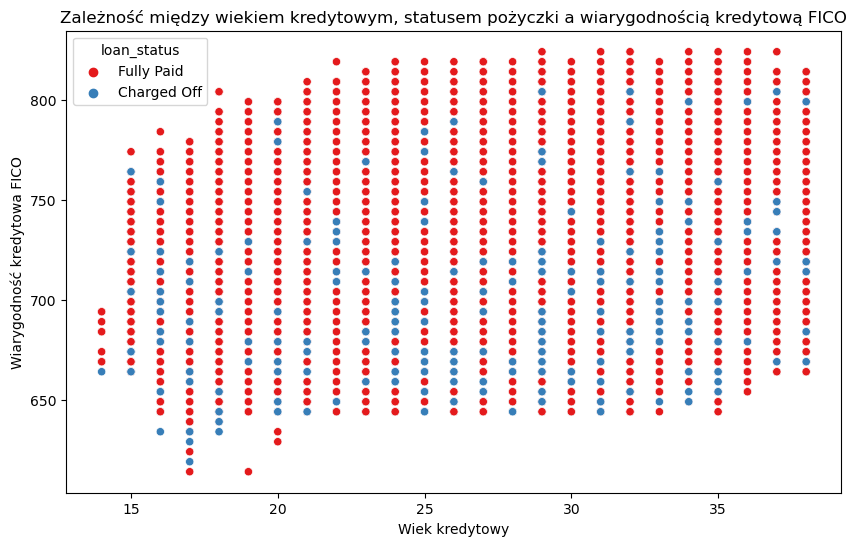

In [33]:
#3
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
loan_data = pd.read_csv('finalnaDB.csv')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%Y/%m/%d')
random_ages = random.sample(list(loan_data['earliest_cr_line'].dt.year), 500)
loan_data = loan_data[loan_data['earliest_cr_line'].dt.year.isin(random_ages)]
current_date = pd.to_datetime('today').normalize()  # Bieżąca data
loan_data['credit_age'] = (current_date - loan_data['earliest_cr_line']).dt.days // 365
columns = ['credit_age', 'loan_status', 'fico_range_high']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='credit_age', y='fico_range_high', hue='loan_status', palette='Set1')
plt.title('Zależność między wiekiem kredytowym, statusem pożyczki a wiarygodnością kredytową FICO')
plt.xlabel('Wiek kredytowy')
plt.ylabel('Wiarygodność kredytowa FICO')
plt.show()

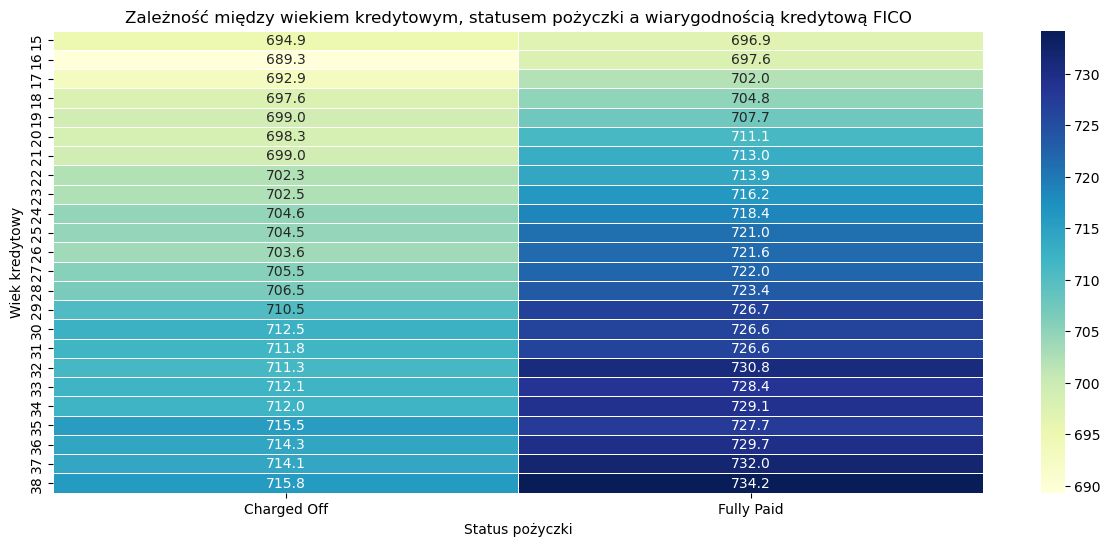

In [34]:
#4
import pandas as pd
import seaborn as sns
import random
loan_data = pd.read_csv('finalnaDB.csv')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%Y/%m/%d')
random_ages = random.sample(list(loan_data['earliest_cr_line'].dt.year), 100)
loan_data = loan_data[loan_data['earliest_cr_line'].dt.year.isin(random_ages)]
current_date = pd.to_datetime('today').normalize()  # Bieżąca data
loan_data['credit_age'] = (current_date - loan_data['earliest_cr_line']).dt.days // 365
columns = ['credit_age', 'loan_status', 'fico_range_high']
pivot_table = loan_data[columns].pivot_table(index='credit_age', columns='loan_status', values='fico_range_high', aggfunc='mean')
plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Zależność między wiekiem kredytowym, statusem pożyczki a wiarygodnością kredytową FICO')
plt.xlabel('Status pożyczki')
plt.ylabel('Wiek kredytowy')
plt.show()


Text(0.5, 1.0, 'Zależność między kwotą pożyczki a rocznym dochodem dla 5% tj. 1953 losowo wybranych wierszy')

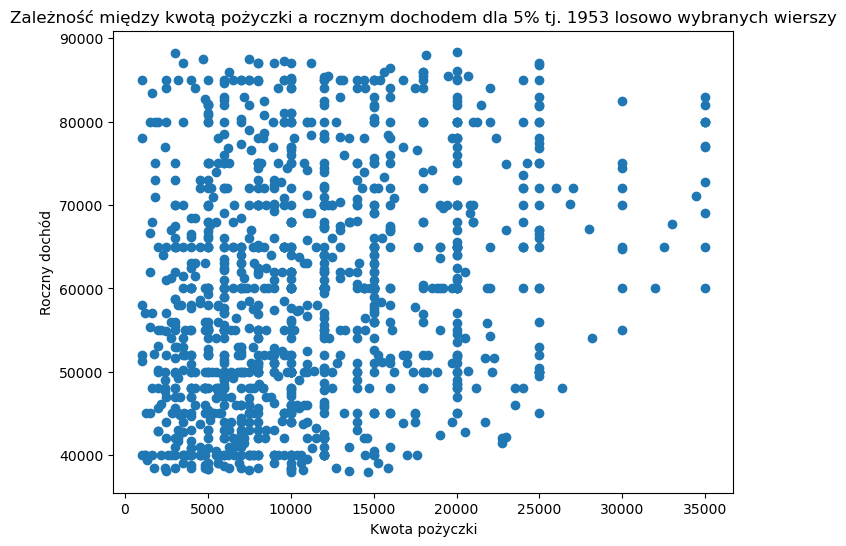

In [35]:
#5
import pandas as pd
import matplotlib.pyplot as plt
import random
loan_data = pd.read_csv('finalnaDB.csv')
def reject_outliers(loan_data, column, percent=20):
    lower_limit = loan_data[column].quantile(percent / 100)
    upper_limit = loan_data[column].quantile(1 - percent / 100)
    filtered_loan_data = loan_data[(loan_data[column] >= lower_limit) & (loan_data[column] <= upper_limit)].copy()
    filtered_loan_data.loc[:, 'annual_inc_filtered'] = filtered_loan_data[column]
    return filtered_loan_data
random_indices = random.sample(range(len(loan_data)), 1953)
loan_data_sampled = loan_data.iloc[random_indices]
filtered_loan_data = reject_outliers(loan_data_sampled, 'annual_inc', percent=20)
loan_amnt = filtered_loan_data['loan_amnt']
annual_inc = filtered_loan_data['annual_inc_filtered']
plt.figure(figsize=(8, 6))
plt.scatter(loan_amnt, annual_inc, alpha=1)
plt.xlabel('Kwota pożyczki')
plt.ylabel('Roczny dochód')
plt.title('Zależność między kwotą pożyczki a rocznym dochodem dla 5% tj. 1953 losowo wybranych wierszy')


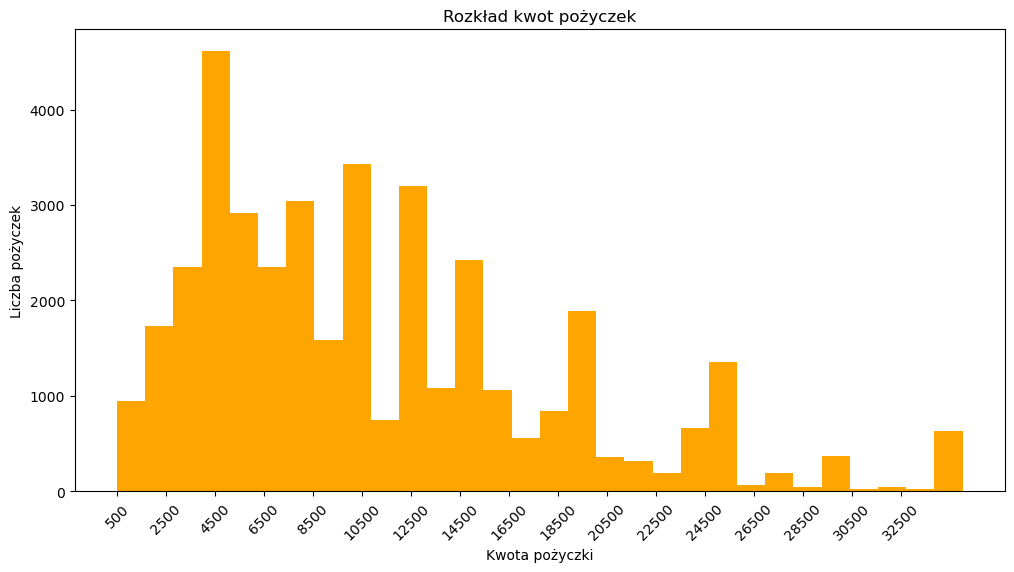

In [36]:
#6
import pandas as pd
import matplotlib.pyplot as plt
loan_data = pd.read_csv('finalnaDB.csv')
loan_amounts = loan_data['loan_amnt']
loan_status_counts = loan_data['loan_status'].value_counts()
plt.figure(figsize=(12, 6))
plt.hist(loan_amounts, bins=30, color='orange')
plt.xlabel('Kwota pożyczki')
plt.ylabel('Liczba pożyczek')
plt.title('Rozkład kwot pożyczek')
plt.xticks(rotation=45)
plt.xticks(range(500, max(loan_status_counts.values)+1, 2000))
plt.show()

Text(0.5, 1.0, 'Udział poszczególnych kategorii w ogólnej liczbie pożyczek')

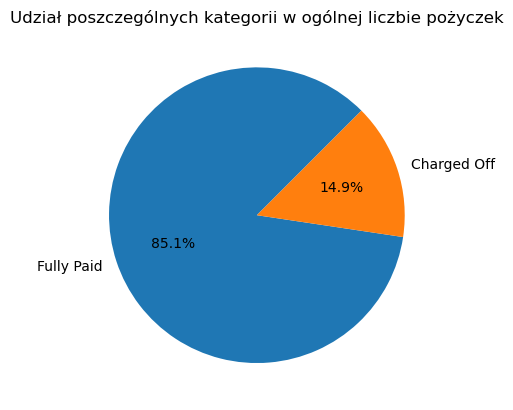

In [37]:
#7
import pandas as pd
import matplotlib.pyplot as plt
loan_data = pd.read_csv('finalnaDB.csv')
loan_status_counts = loan_data['loan_status'].value_counts()
labels = loan_status_counts.index
sizes = loan_status_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
plt.title('Udział poszczególnych kategorii w ogólnej liczbie pożyczek')


In [ ]:
# Dziękuję za uwagę. Pozdrawiam!